In [41]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
# load the data
df = pd.read_csv('/Users/saimasultana/Downloads/creditcard_2023.csv')

In [43]:
# inspect the first few rows
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [44]:
# summary statistics
print(df.describe())

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.323544e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.197521e-18 -3.838678e-17 -3.198898e-17  2.069287e-17  9.116859e-17   
std    1.000001e+00  1.000001e+00  1.00000

In [45]:
# data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

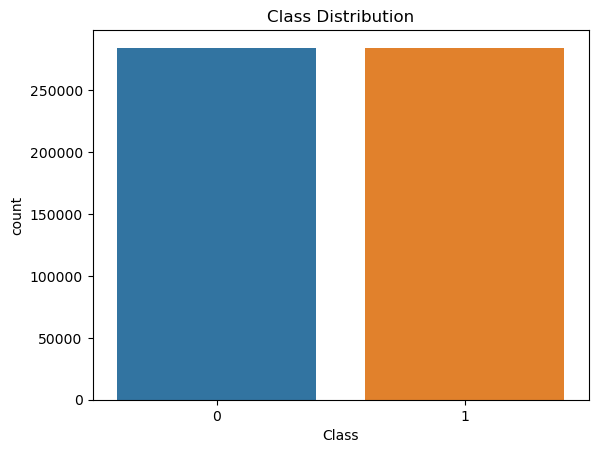

In [46]:
# class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

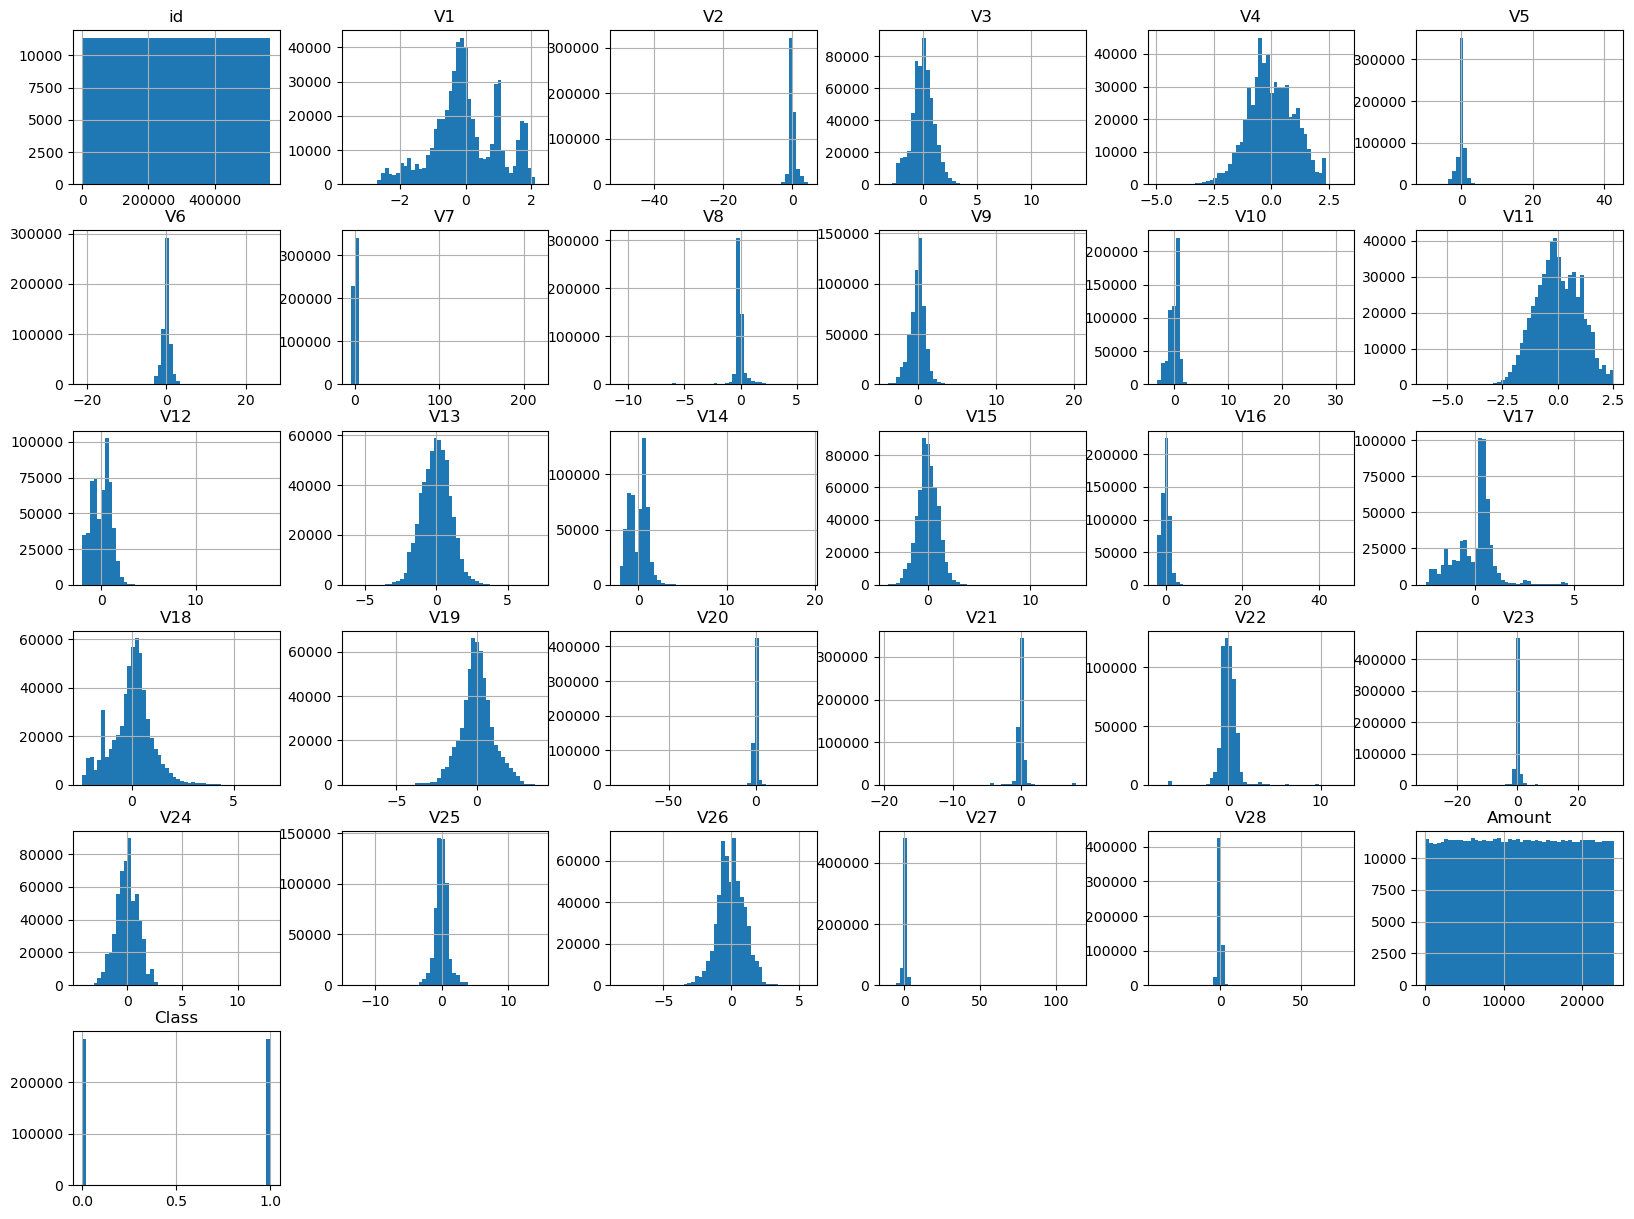

In [47]:
# feature distributions
df.hist(bins=50, figsize=(20, 15))
plt.show()

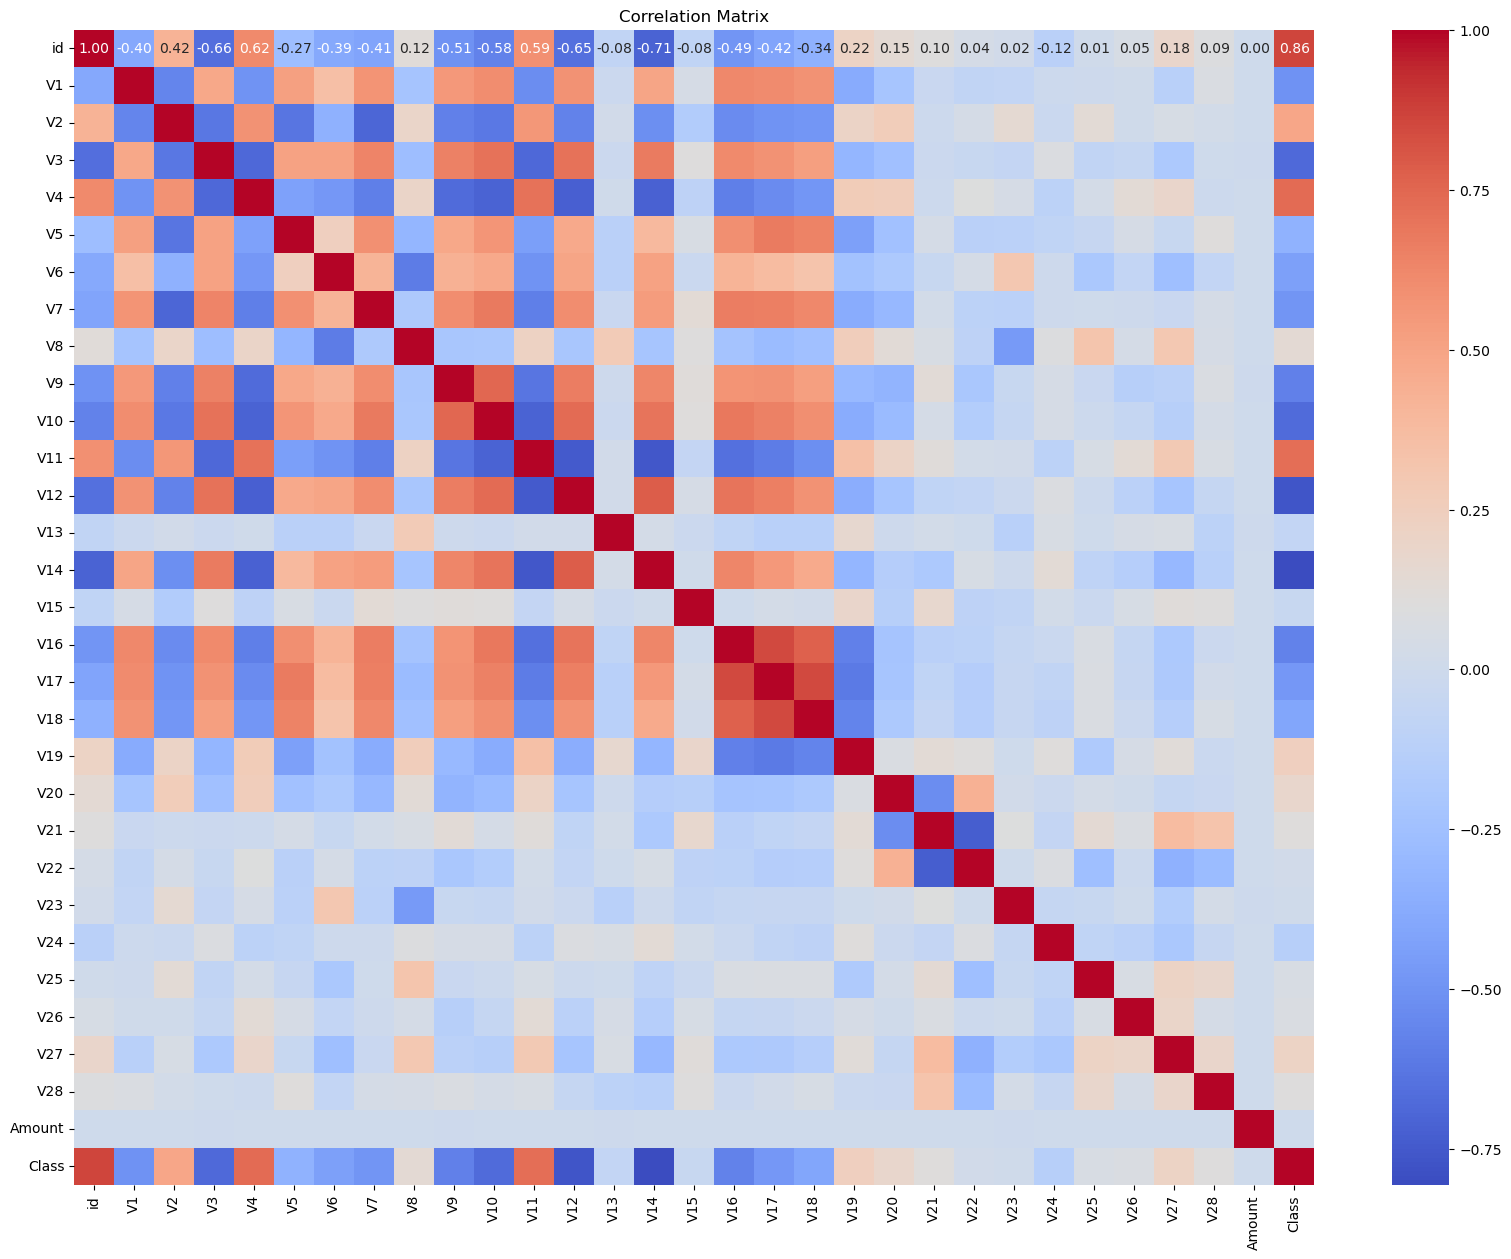

In [48]:
# correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/Users/saimasultana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


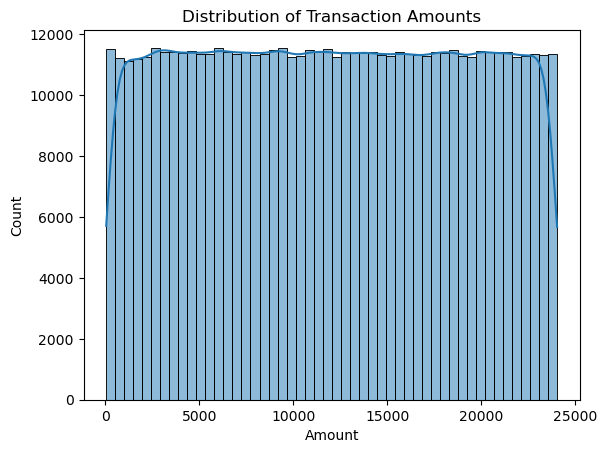

In [49]:
# amount analysis
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

In [20]:
# feature selection
X = df.drop(columns=['id', 'Class'],axis=1)
y = df['Class'] 

In [21]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# logistic regression model
logistic_model = LogisticRegression(random_state=42)

In [24]:
# train the model
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
# predict on the test set
logistic_pred = logistic_model.predict(X_test)

In [26]:
# random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
# train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# predict on the test set
rf_pred = rf_model.predict(X_test)

In [29]:
# evaluate logistic regression
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)

In [30]:
# evaluate random forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [31]:
# print evaluation metrics
print("Logistic Regression:")
print(f'Accuracy: {logistic_accuracy}')
print(f'Precision: {logistic_precision}')
print(f'Recall: {logistic_recall}')
print(f'F1 Score: {logistic_f1}')

print("\nRandom Forest:")
print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'F1 Score: {rf_f1}')

Logistic Regression:
Accuracy: 0.965214638692999
Precision: 0.9773652177044694
Recall: 0.9526291771974165
F1 Score: 0.9648386810061328

Random Forest:
Accuracy: 0.9998856901675958
Precision: 0.9997718858025233
Recall: 1.0
F1 Score: 0.999885929890756


In [32]:
# cross-validation
logistic_cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=10, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='accuracy')

print(f'\nLogistic Regression Cross-Validation Accuracy: {logistic_cv_scores.mean()}')
print(f'Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean()}')


Logistic Regression Cross-Validation Accuracy: 0.9631887167402352
Random Forest Cross-Validation Accuracy: 0.9998100698169285


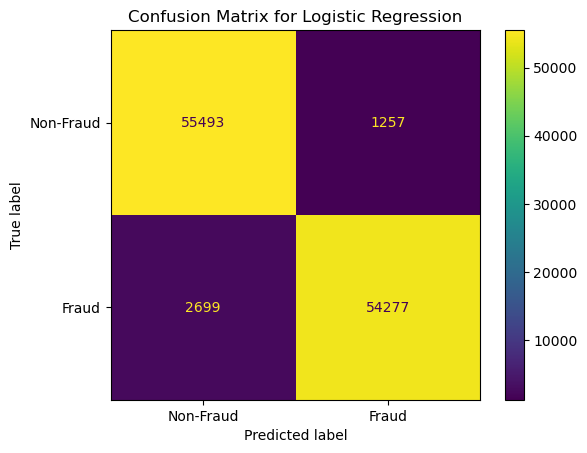

In [35]:
# confusion matrix for logistic regression
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_disp = ConfusionMatrixDisplay(confusion_matrix=logistic_cm, display_labels=['Non-Fraud', 'Fraud'])
logistic_disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

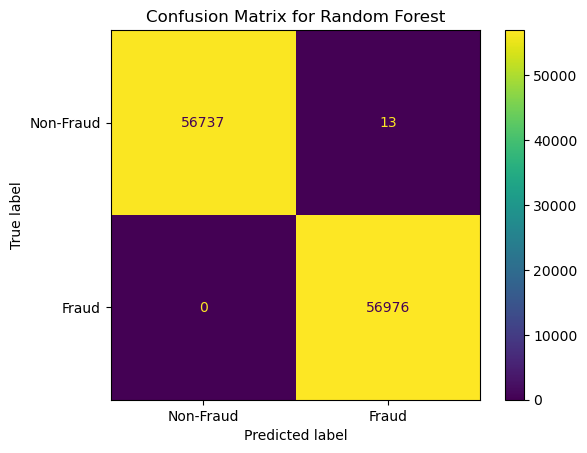

In [36]:
# confusion matrix for random forest
rf_cm = confusion_matrix(y_test, rf_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Non-Fraud', 'Fraud'])
rf_disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()